In [1]:
%load_ext autoreload
%autoreload 2

from torch.utils.data import DataLoader

from src.deep_ad.config import Config
from src.deep_ad.data.dagm_split import dagm_patch_get_splits
from src.deep_ad.model import DeepCNN
from src.deep_ad.trainer import Trainer
from src.deep_ad.transforms import create_training_transform, create_validation_transform

In [2]:
# Load the configuration
config = Config(root_dir='..')

### Test the trainer

In [4]:
# Load the model
model = DeepCNN().to(config.device)
model_num_params = sum(p.numel() for p in model.parameters())
print(f"Model has {model_num_params:,} parameters")

Model has 1,444,737 parameters


In [5]:
# Load the datasets
train_transform = create_training_transform(config)
val_transform = create_validation_transform(config)
train_dataset, val_dataset, test_dataset = dagm_patch_get_splits(config, train_transform, val_transform)

In [6]:
# Create the dataloaders
train_dataloader = DataLoader(train_dataset, batch_size=config.batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=config.batch_size, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=config.batch_size, shuffle=False)

In [7]:
# Create the trainer
trainer = Trainer(config, model, train_dataloader, val_dataloader, train_epochs=2, limit_batches=1)

In [8]:
# Start training
trainer.train()

In [4]:
import torch
model2 = DeepCNN().to(config.device)
model2.load_state_dict(torch.load('../models/first_run.pth'))

<All keys matched successfully>

In [14]:
images, keys = next(iter(train_dataloader))
input_images = []
outputs = []
for i in range(4):
    image = images[i]
    input_images.append(image.squeeze().detach().cpu().numpy())
    input = image.unsqueeze(0).to(config.device)
    input[48:80, 48:80] = 0
    output = model(input)
    outputs.append(output.squeeze().detach().cpu().numpy())

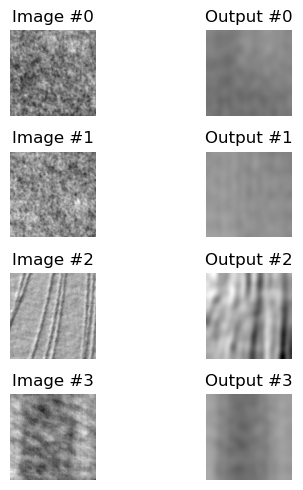

In [15]:
%matplotlib inline
from src.deep_ad.image import plot_images

def flatten(xs):
    return [x for ys in xs for x in ys]

titles = flatten([[f"Image #{i}", f"Output #{i}"] for i in range(4)])
plot_images(flatten(list(zip(input_images, outputs))), titles, rows=4, cols=2)

In [54]:
import torch

state_dict = model.state_dict()
torch.save(state_dict, '../models/first_run.pth')